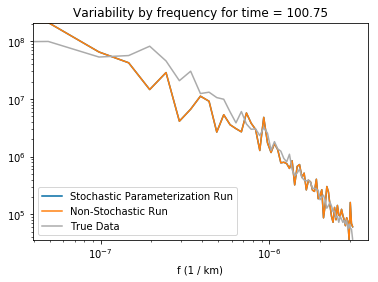

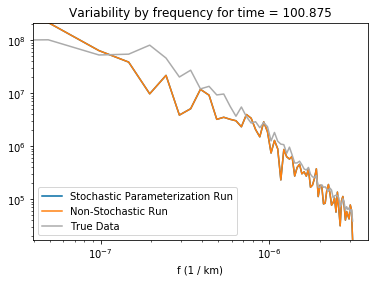

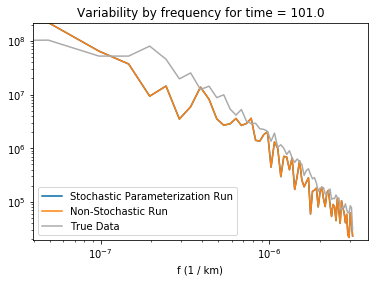

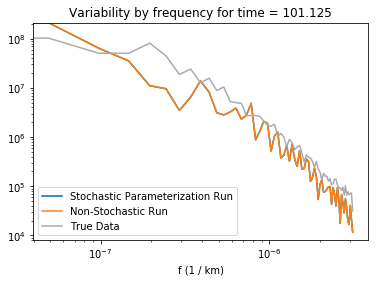

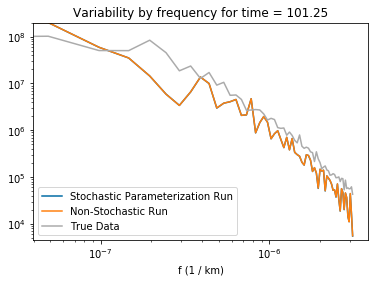

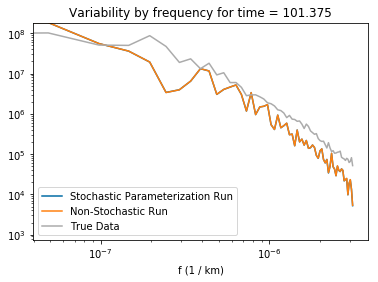

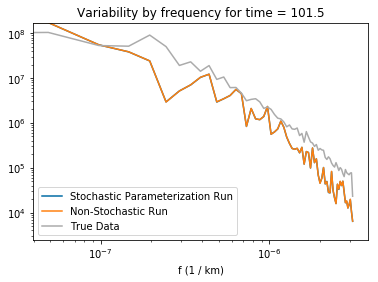

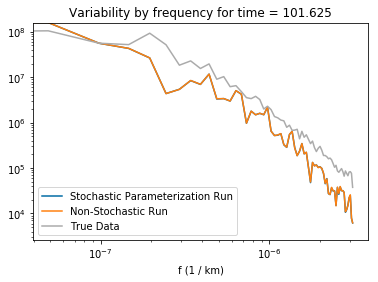

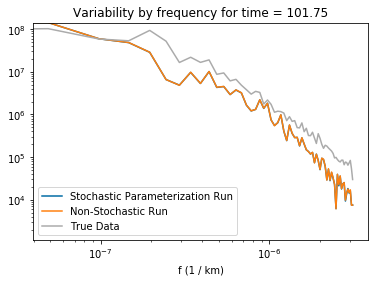

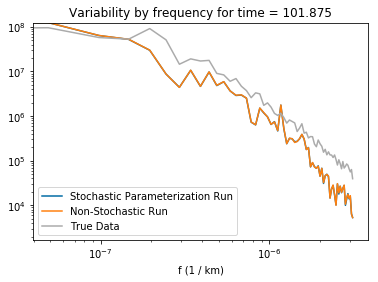

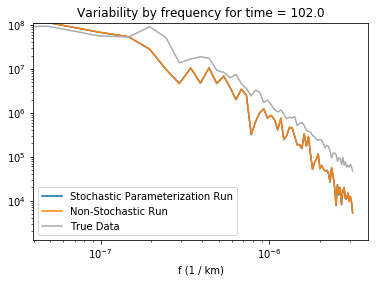

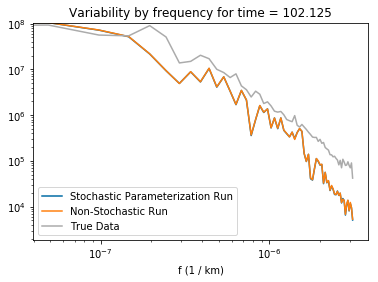

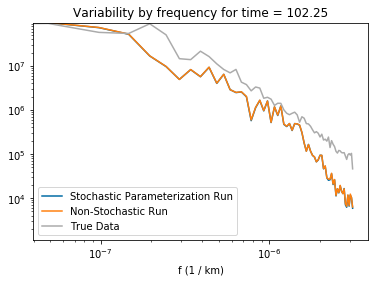

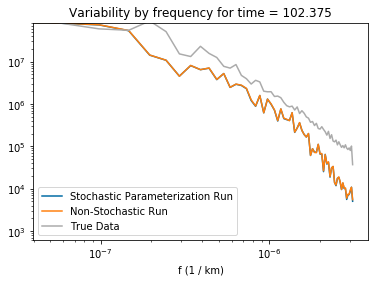

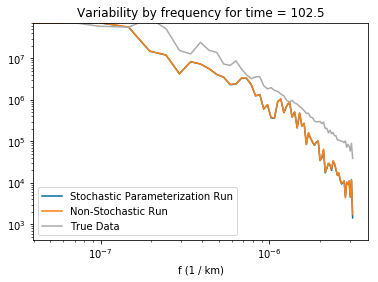

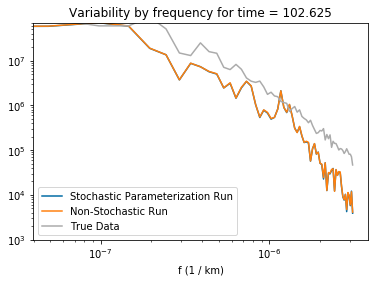

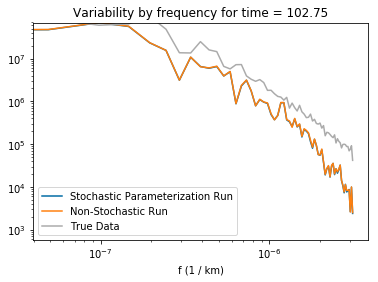

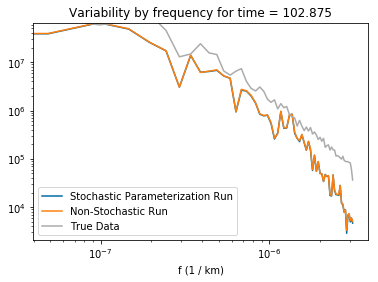

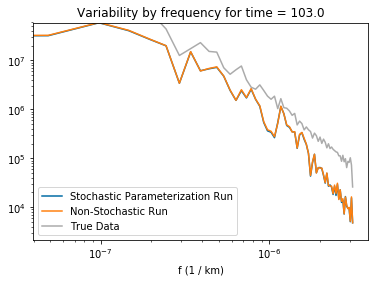

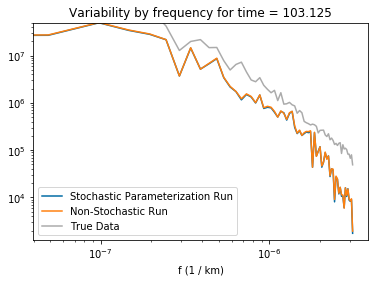

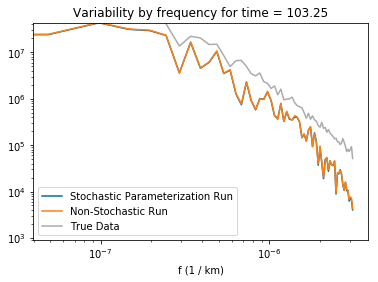

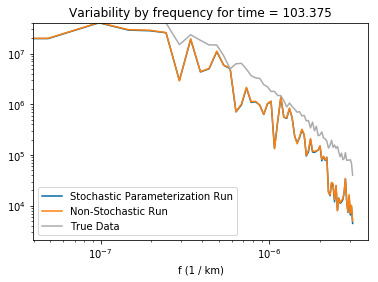

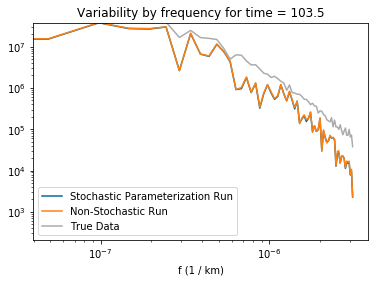

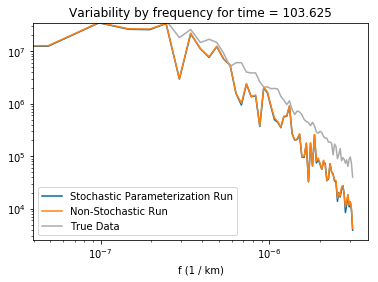

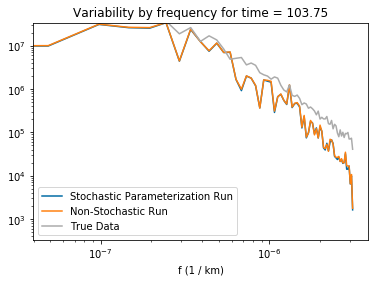

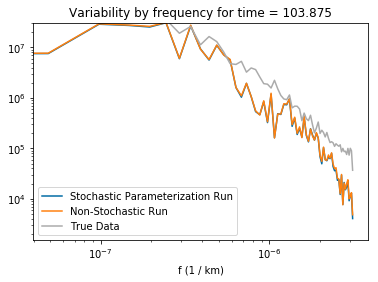

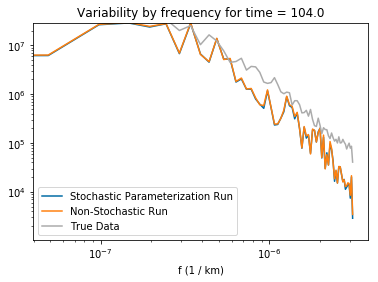

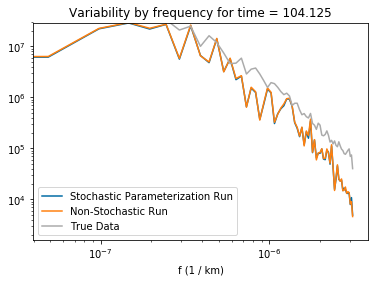

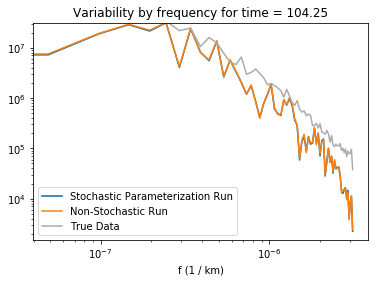

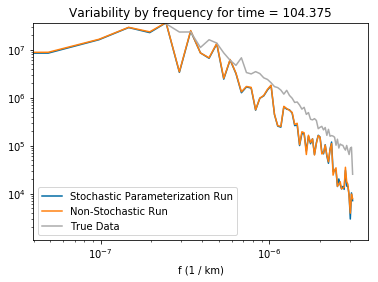

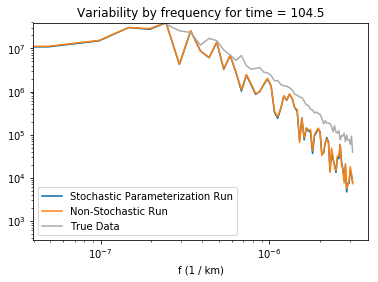

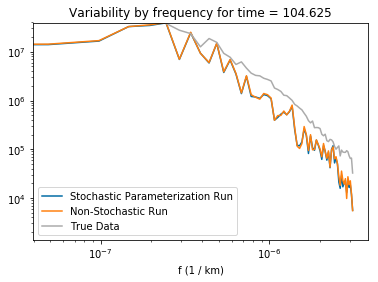

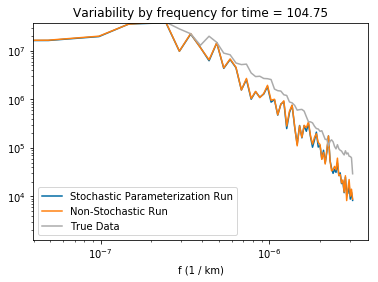

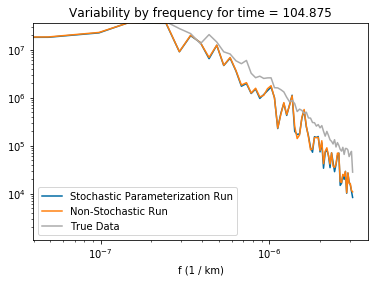

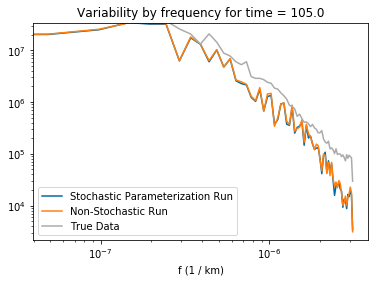

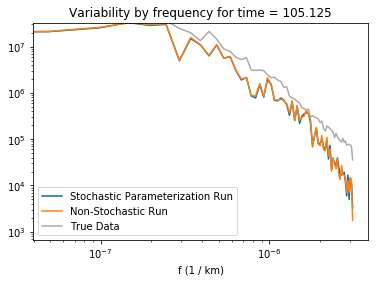

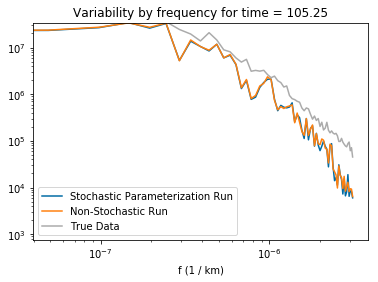

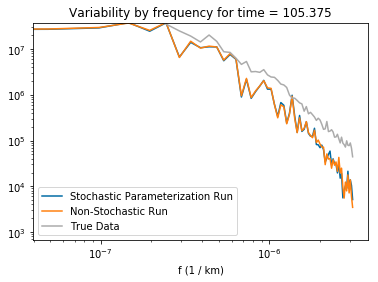

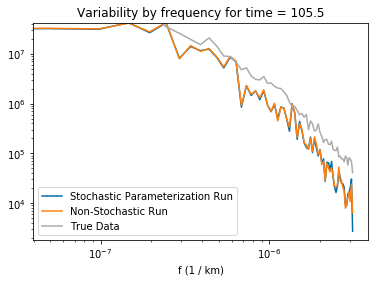

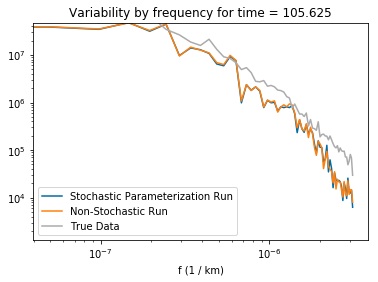

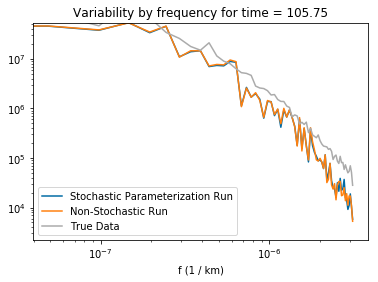

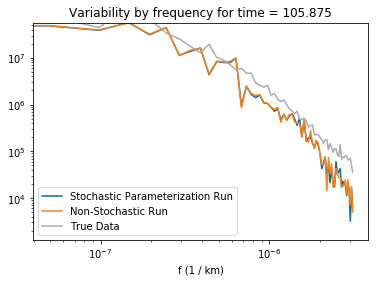

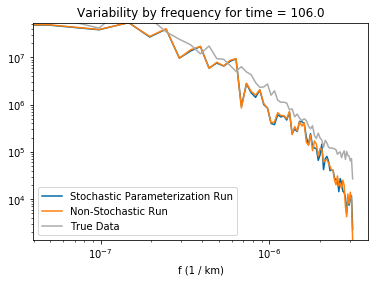

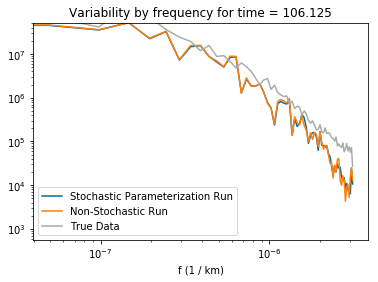

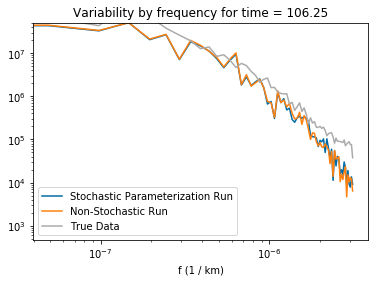

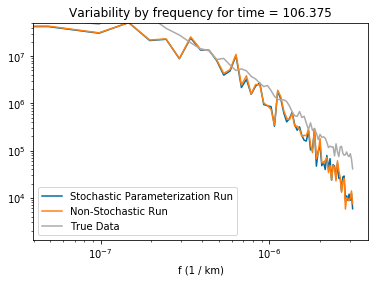

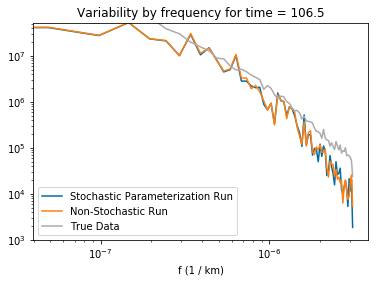

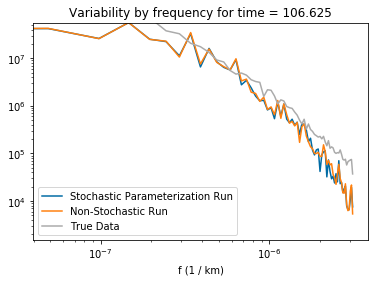

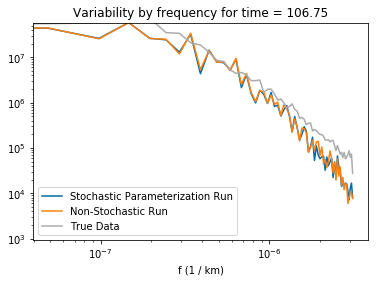

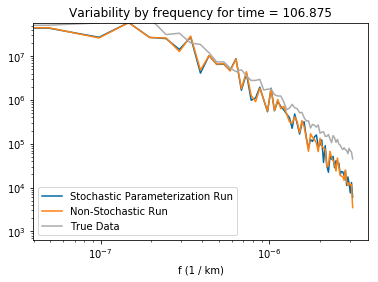

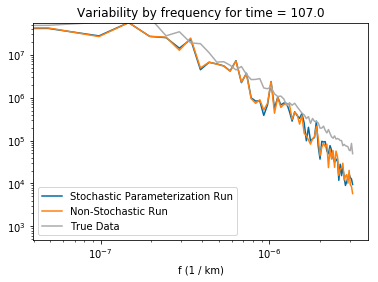

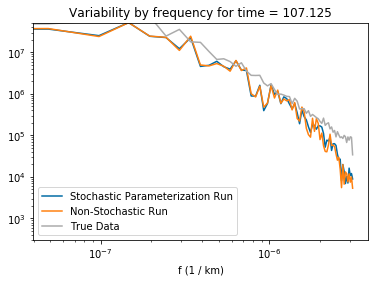

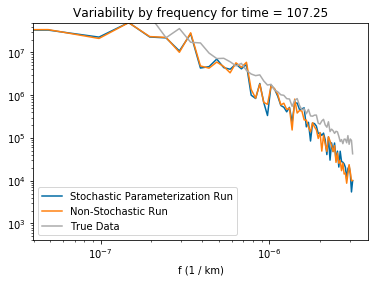

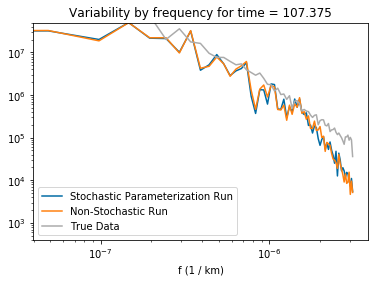

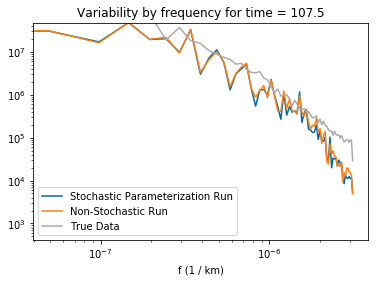

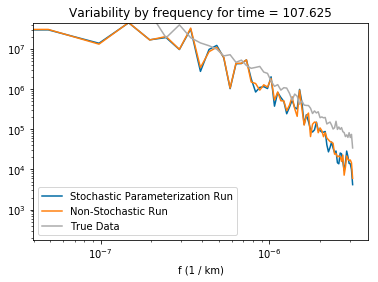

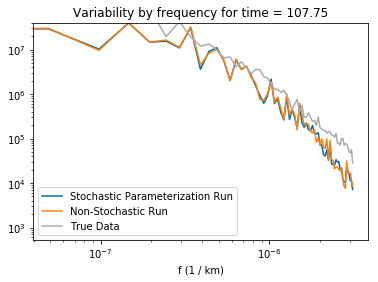

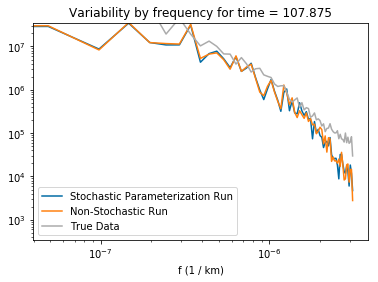

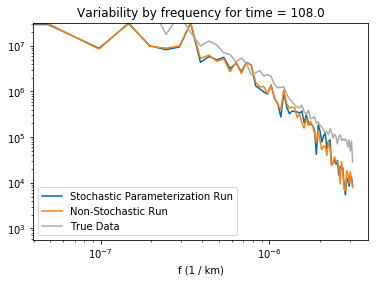

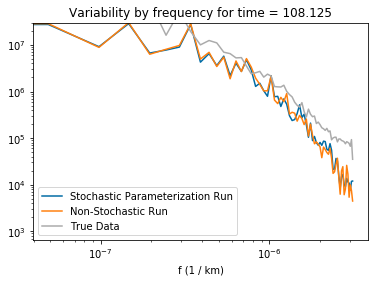

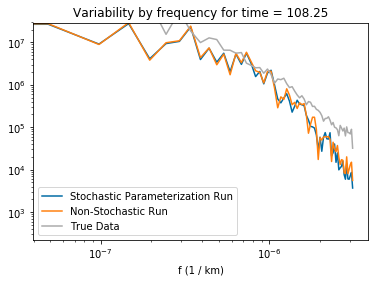

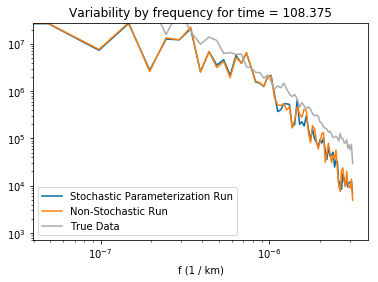

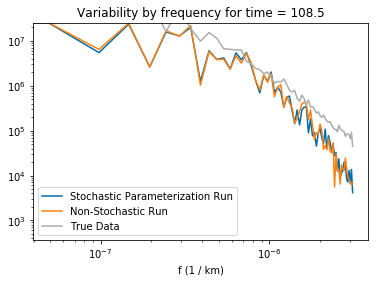

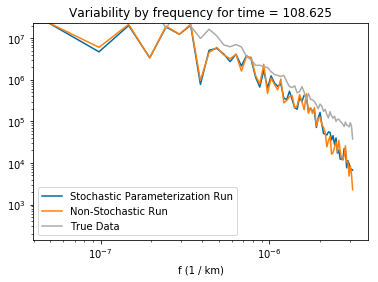

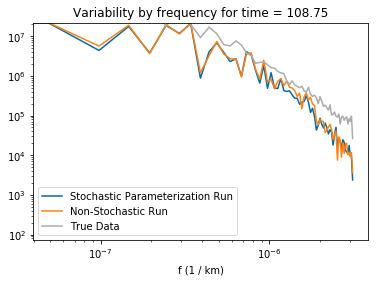

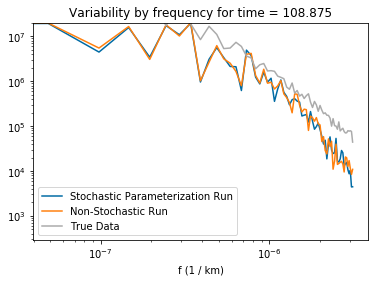

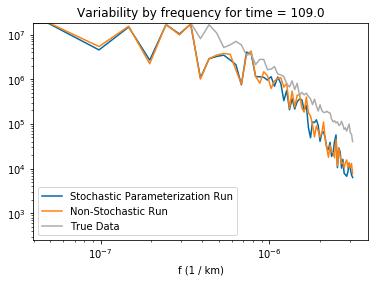

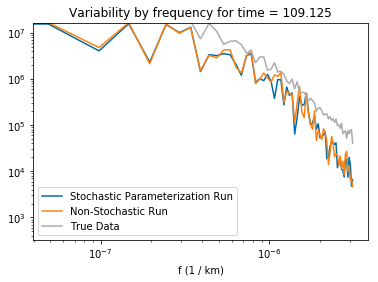

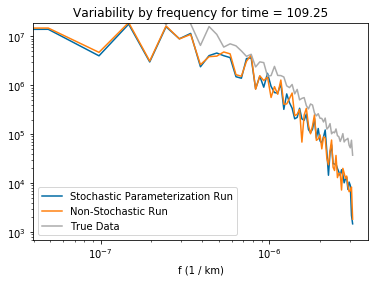

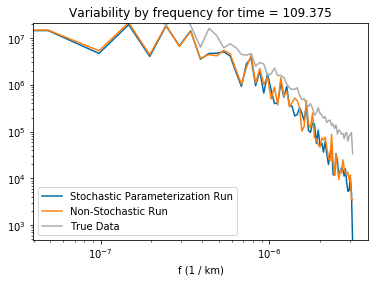

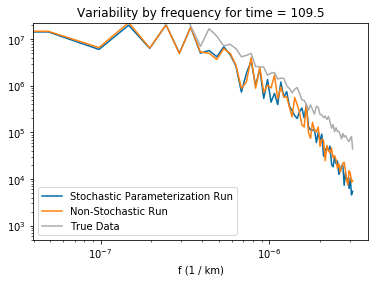

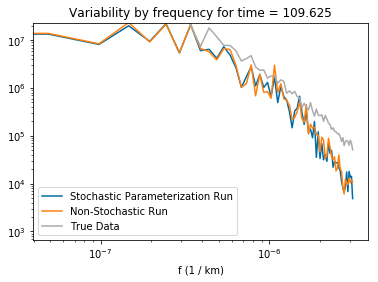

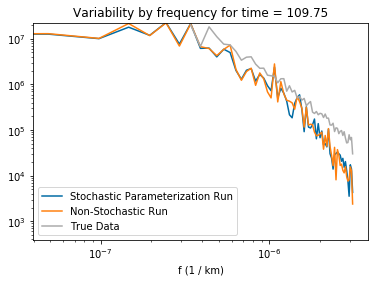

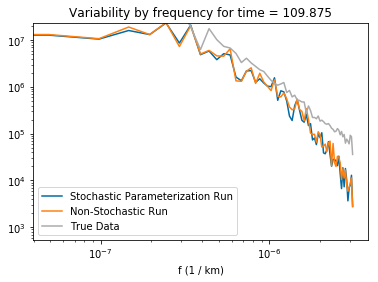

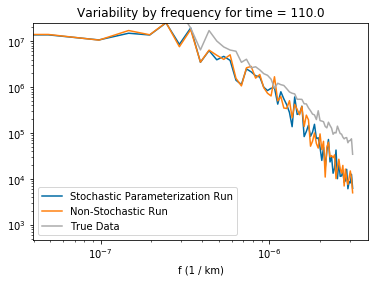

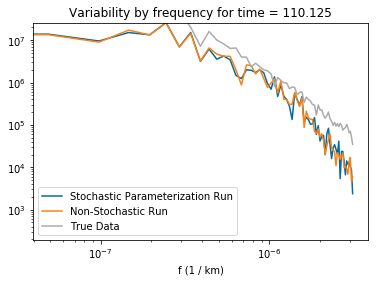

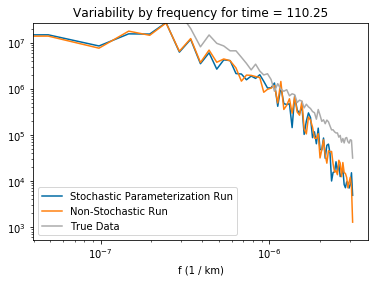

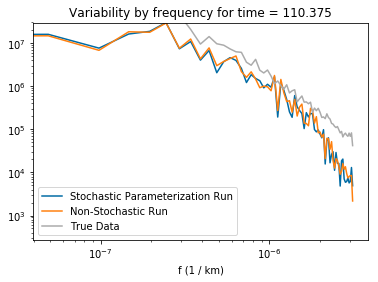

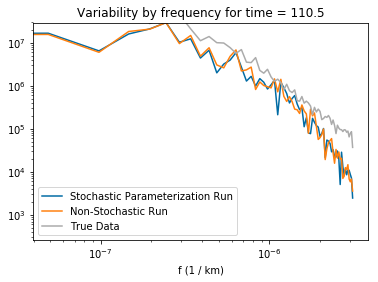

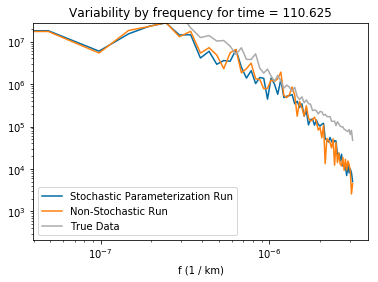

In [2]:
from matplotlib import pyplot as plt
import xarray as xr
from uwnet.stochastic_parameterization.utils import get_dataset
from uwnet.thermo import periodogram


dir_ = '/Users/stewart/projects/uwnet/uwnet/stochastic_parameterization/'
base_model_location = dir_ + 'full_model/1.pkl'
ds_location = dir_ + 'training.nc'
ds_true = get_dataset(
    t_start=0,
    t_stop=100,
    ds_location=ds_location,
    base_model_location=base_model_location)
dir_ = '/Users/stewart/Desktop/'

ds_no_param = xr.open_dataset(dir_ + 'no_parameterization.nc').isel(
    y=range(28, 36))
ds_s = xr.open_dataset(dir_ + 'stochastic_model_gcm_output.nc').isel(
    y=range(28, 36))
ds_b = xr.open_dataset(dir_ + 'base_model_gcm_output.nc').isel(
    y=range(28, 36))

ds_s_p = periodogram(ds_s.PW).mean('y')
ds_b_p = periodogram(ds_b.PW).mean('y')
ds_no_param_p = periodogram(ds_no_param.PW).mean('y')
ds_true_p = periodogram(ds_true.PW).mean('y')

%matplotlib inline
plt.style.use('tableau-colorblind10')

for time in ds_s.time:
    no_param_values = ds_no_param_p.sel(time=time).values
    stochastic_values = ds_s_p.sel(time=time).values
    base_model_values = ds_b_p.sel(time=time).values
    true_values = ds_true_p.sel(time=time).values
    plt.loglog(
        ds_s_p.sel(time=time).f,
        stochastic_values,
        label='Stochastic Parameterization Run')
    plt.loglog(
        ds_b_p.sel(time=time).f,
        base_model_values,
        label='Non-Stochastic Run')
    plt.loglog(
        ds_no_param_p.sel(time=time).f,
        true_values,
        label='True Data')
    # plt.loglog(
    #     ds_no_param_p.sel(time=time).f,
    #     no_param_values,
    #     label='No Parameterization')
    bottom = min(
        no_param_values[no_param_values > 1e-3].min(),
        # stochastic_values[stochastic_values > 1e-3].min(),
        base_model_values[base_model_values > 1e-3].min(),
        true_values[true_values > 1e-3].min(),
    )
    plt.gca().set_ylim(
        bottom=bottom,
        top=max(
            ds_no_param_p.sel(time=time).max(),
            ds_true.sel(time=time).max(),
            ds_b_p.sel(time=time).max(),
            ds_s_p.sel(time=time).max()
        )
    )
    plt.legend()
    plt.xlabel('f (1 / km)')
    plt.title('Variability by frequency for time = ' + str(time.values))
    plt.show()
